In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf  # acf
from statsmodels.graphics.tsaplots import plot_pacf  # pacf
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [209]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [210]:
import pandas_datareader as data
from pandas_profiling import ProfileReport


<IPython.core.display.Javascript object>

### Prepare data

In [211]:
start = "2010-01-01"
end = "2022-08-19"

df = data.DataReader("AAPL", "yahoo", start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537302
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421423


<IPython.core.display.Javascript object>

In [212]:
split = 100

df_test = df.tail(split)
df = df.iloc[:-split, :]

<IPython.core.display.Javascript object>

In [213]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3081.000000,3081.000000,3081.000000,3081.000000,3.081000e+03,3081.000000
mean,45.556242,44.606968,45.077227,45.102774,2.669345e+08,43.228602
std,41.902404,40.914421,41.395677,41.436910,2.250468e+08,41.833125
min,7.000000,6.794643,6.870357,6.858929,4.100000e+07,5.856373
25%,18.773930,18.464287,18.607143,18.612143,1.080380e+08,16.295805
50%,28.892500,28.330000,28.577499,28.580000,1.799940e+08,26.275402
75%,50.782501,49.807499,50.202499,50.375000,3.643444e+08,49.035667
max,182.940002,179.119995,182.630005,182.009995,1.880998e+09,181.259918


<IPython.core.display.Javascript object>

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3081 entries, 2009-12-31 to 2022-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3081 non-null   float64
 1   Low        3081 non-null   float64
 2   Open       3081 non-null   float64
 3   Close      3081 non-null   float64
 4   Volume     3081 non-null   float64
 5   Adj Close  3081 non-null   float64
dtypes: float64(6)
memory usage: 168.5 KB


<IPython.core.display.Javascript object>

### EDA

In [215]:
data_profile = ProfileReport(df)
data_profile.to_file("data_eda.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [216]:
data_profile

<IPython.core.display.Javascript object>

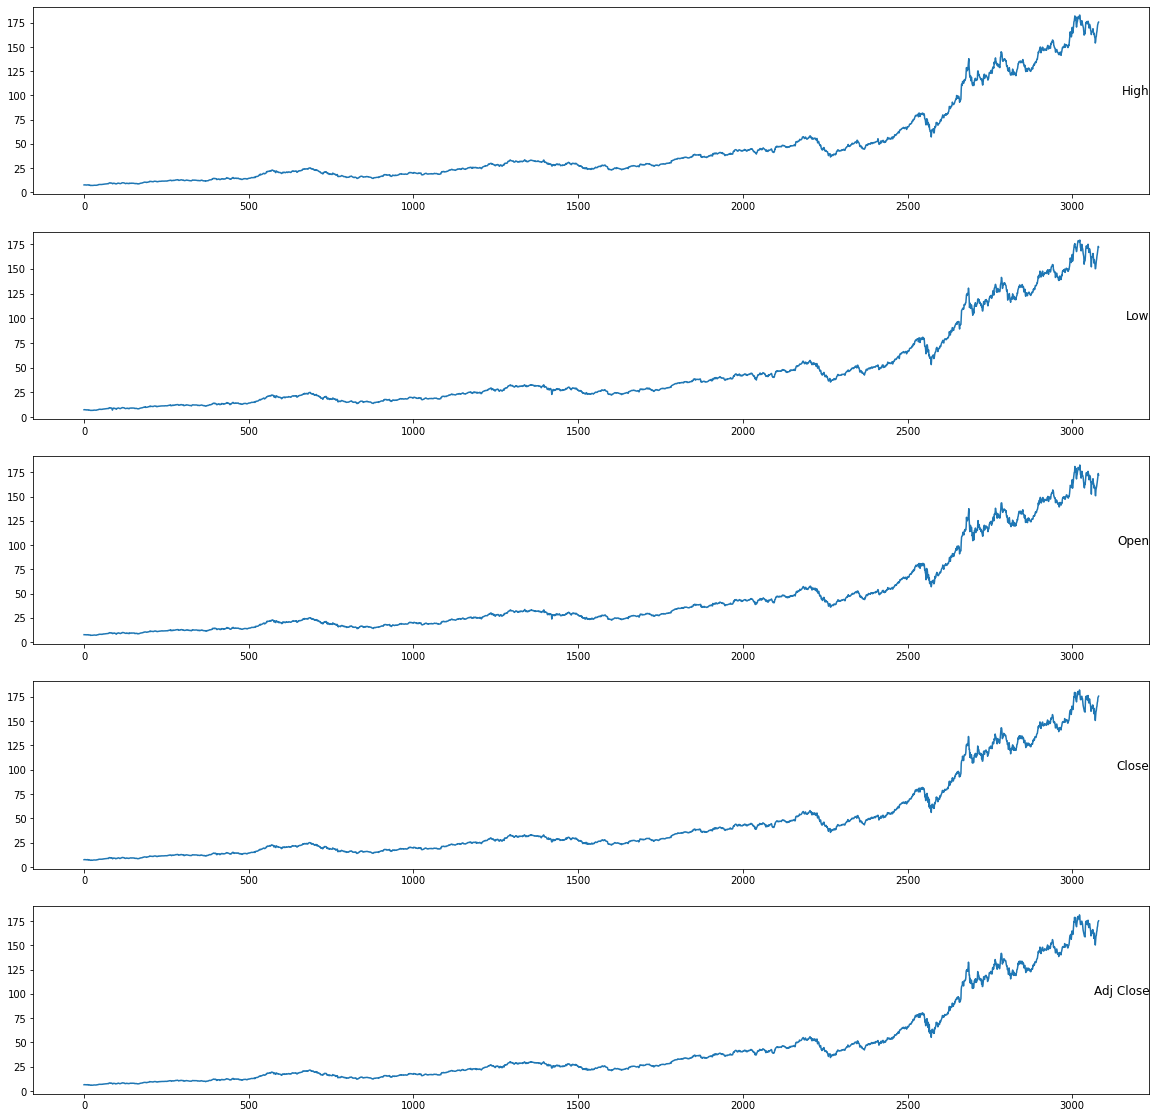

<IPython.core.display.Javascript object>

In [217]:
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5]
i = 1
# plot each column
plt.figure(figsize=(20, 20))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc="right")
    i += 1
plt.show()

In [218]:
df_close = df[["Close"]]

<IPython.core.display.Javascript object>

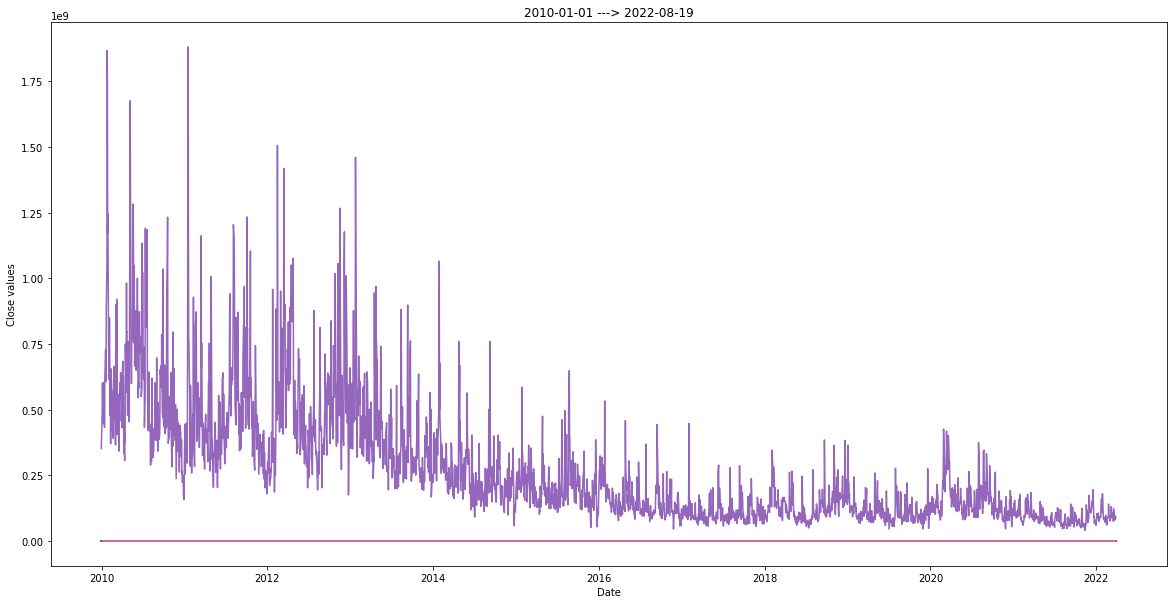

<IPython.core.display.Javascript object>

In [219]:
plt.figure(figsize=(20, 10))
plt.plot(df)
plt.ylabel("Close values")
plt.xlabel("Date")
plt.plot(df_close.rolling(window=8, center=True).mean())
plt.title("2010-01-01 ---> 2022-08-19")
plt.show()  


### Train_test_Split

In [220]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

<IPython.core.display.Javascript object>

In [162]:
# X = df[['Open', 'High', 'Low', 'Volume', 'Adj Close']]
# y = df[['Close']]

# num_split = round(len(df) * 75 / 100)
# X_train = X[:num_split]
# y_train = y[:num_split]
# X_test = X[num_split:]
# y_test = y[num_split:]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)


<IPython.core.display.Javascript object>

In [221]:
def create_features(df, label):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

<IPython.core.display.Javascript object>

In [222]:
num_split = round(len(df) * 75 / 100)
train_sets = df[:num_split][['Close']]
test_sets = df[num_split:][['Close']]

train_sets = np.log(train_sets)
test_sets = np.log(test_sets)


<IPython.core.display.Javascript object>

In [223]:
X_train, y_train = create_features(train_sets, label='Close')
X_test, y_test = create_features(test_sets, label='Close')

<IPython.core.display.Javascript object>

### XGBOOST MODEL

In [224]:
def evaluate(model, X_train, X_test, y_train, y_test):
    yhat_train = model.predict(X_train)
    yhat_test = model.predict(X_test)

    print(
        "\n***TRAINIG RESULTS***: \n=================================================="
    )
    print("MSE train dataset:", mean_squared_error(y_train, yhat_train))
    print("RMSE train dataset:", mean_squared_error(y_train, yhat_train, squared=False))
    print("MAE train dataset:", mean_absolute_error(y_train, yhat_train))

    print("\n***TEST RESULTS***: \n===================================================")
    print("MSE test dataset:", mean_squared_error(y_test, yhat_test))
    print("RMSE test dataset:", mean_squared_error(y_test, yhat_test, squared=False))
    print("MAE test dataset:", mean_absolute_error(y_test, yhat_test))

<IPython.core.display.Javascript object>

In [232]:
import xgboost as xgb

model_xgboost = xgb.XGBRegressor(n_estimators=10000)
model_xgboost.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=100,
        verbose=1)

[0]	validation_0-rmse:1.86353	validation_1-rmse:3.12759
[1]	validation_0-rmse:1.30850	validation_1-rmse:2.43063
[2]	validation_0-rmse:0.91947	validation_1-rmse:1.95953
[3]	validation_0-rmse:0.64693	validation_1-rmse:1.61793
[4]	validation_0-rmse:0.45587	validation_1-rmse:1.38523
[5]	validation_0-rmse:0.32222	validation_1-rmse:1.22096
[6]	validation_0-rmse:0.22859	validation_1-rmse:1.10823
[7]	validation_0-rmse:0.16260	validation_1-rmse:1.03063
[8]	validation_0-rmse:0.11664	validation_1-rmse:0.98151
[9]	validation_0-rmse:0.08451	validation_1-rmse:0.94445
[10]	validation_0-rmse:0.06220	validation_1-rmse:0.91891
[11]	validation_0-rmse:0.04711	validation_1-rmse:0.90189
[12]	validation_0-rmse:0.03690	validation_1-rmse:0.88974
[13]	validation_0-rmse:0.03041	validation_1-rmse:0.88088
[14]	validation_0-rmse:0.02633	validation_1-rmse:0.87542
[15]	validation_0-rmse:0.02380	validation_1-rmse:0.87120
[16]	validation_0-rmse:0.02220	validation_1-rmse:0.86813
[17]	validation_0-rmse:0.02069	validation

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [226]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


<IPython.core.display.Javascript object>

In [227]:
evaluate(model_xgboost, X_train, X_test, y_train, y_test)


***TRAINIG RESULTS***: 
MSE train dataset: 0.0002174462787756146
RMSE train dataset: 0.014746059771193611
MAE train dataset: 0.011153077376713708

***TEST RESULTS***: 
MSE test dataset: 0.744591906639876
RMSE test dataset: 0.8628973905626763
MAE test dataset: 0.7380777653390435


<IPython.core.display.Javascript object>

In [228]:
X_test.columns

Index(['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

<IPython.core.display.Javascript object>

In [229]:
y_test_hat = model_xgboost.predict(X_test)
y_test_hat = pd.Series(y_test_hat, index = y_test.index)

<IPython.core.display.Javascript object>

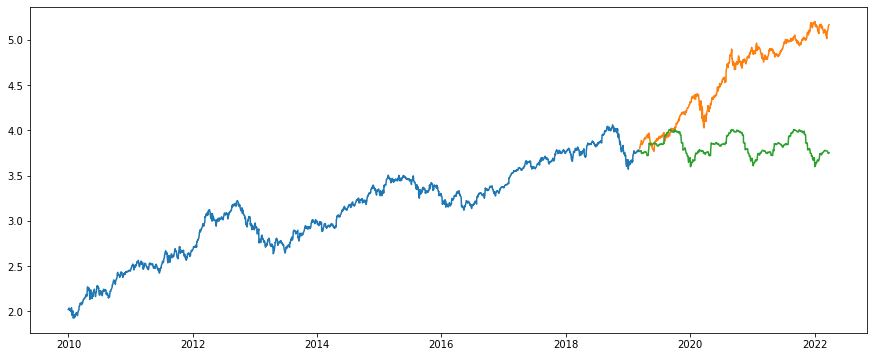

<IPython.core.display.Javascript object>

In [230]:
a = model_xgboost.predict(X_test)

# plot baseline and predictions
plt.figure(figsize=(15,6))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Real')
plt.plot(y_test_hat, label='Predict')
plt.show()

In [189]:
y_train

Date
2009-12-31    2.018373
2010-01-04    2.033818
2010-01-05    2.035546
2010-01-06    2.019511
2010-01-07    2.017661
                ...   
2019-03-04    3.783337
2019-03-05    3.781516
2019-03-06    3.775745
2019-03-07    3.764103
2019-03-08    3.766477
Name: Close, Length: 2311, dtype: float64

<IPython.core.display.Javascript object>

In [181]:
import pickle
pickle.dump(model_xgboost, open('xgboost.h5', "wb"))


<IPython.core.display.Javascript object>

In [26]:
# model_xgboost = pickle.load(open('xgboost.h5', "rb"))


<IPython.core.display.Javascript object>

### Predict new value

In [182]:
# import datetime
new_date = datetime.datetime(2022, 8, 20, 0, 0)
look_back_value = 100
df_new = pd.DataFrame({'Close' : [look_back_value] , 'Date' : [new_date]}).set_index('Date')

X_new, y_new = create_features(df_new, 'Close')



<IPython.core.display.Javascript object>

In [183]:
model_xgboost.predict(X_new)

array([2.0356693], dtype=float32)

<IPython.core.display.Javascript object>

In [184]:
np.exp(model_xgboost.predict(X_new))

array([7.6573763], dtype=float32)

<IPython.core.display.Javascript object>

In [ ]:
arima/sarima / holtwinter